In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import animation

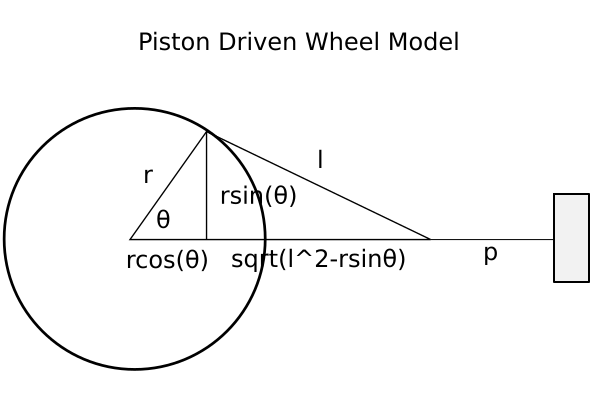

In [2]:
t = smp.symbols('t')
m, I = smp.symbols('m I')
r, l, p = smp.symbols('r l p')

In this case our generalised coordinates are $x$ and $\theta$

In [3]:
theta = smp.symbols(r'\theta', cls=smp.Function)


Explicitly write them as functions of time $t$:

In [4]:
theta = theta(t)
x = r*smp.cos(theta) + smp.sqrt(l**2 - (r*smp.sin(theta))**2) + p

Find the derivatives: $\dot\theta$, $\ddot\theta$, $\dot x$, $\ddot x$

In [5]:
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)

Express kinetic and potential energy in terms of the generalised coordinates

In [6]:
# Kinetic energy of flywheel
T_f = 1/2* I *(smp.diff(theta,t)**2)

# Kinetic energy of the piston
T_p = 1/2 * m *(smp.diff(x,t)**2)


L = T_f + T_p

Get Lagrnage's Equations: 
$$ \frac{\partial L}{\partial x} - \frac{d}{dt}\frac{\partial L}{\partial \dot x} = 0   $$

In [7]:
L

0.5*I*Derivative(\theta(t), t)**2 + 0.5*m*(-r**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)/sqrt(l**2 - r**2*sin(\theta(t))**2) - r*sin(\theta(t))*Derivative(\theta(t), t))**2

In [8]:
LE_1 = (smp.diff(L,theta) - smp.diff(smp.diff(L,theta_d),t))

In [9]:
LE_1

-1.0*I*Derivative(\theta(t), (t, 2)) - 0.5*m*(-2*r**2*sin(\theta(t))*cos(\theta(t))/sqrt(l**2 - r**2*sin(\theta(t))**2) - 2*r*sin(\theta(t)))*(-r**4*sin(\theta(t))**2*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(l**2 - r**2*sin(\theta(t))**2)**(3/2) + r**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2/sqrt(l**2 - r**2*sin(\theta(t))**2) - r**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), (t, 2))/sqrt(l**2 - r**2*sin(\theta(t))**2) - r**2*cos(\theta(t))**2*Derivative(\theta(t), t)**2/sqrt(l**2 - r**2*sin(\theta(t))**2) - r*sin(\theta(t))*Derivative(\theta(t), (t, 2)) - r*cos(\theta(t))*Derivative(\theta(t), t)**2)

In [10]:
sols = smp.solve([LE_1],(theta_dd), simlpify=True, rational=False)

With the solution for the equations of motion of the system, undo the symbolic expression and perform integration. We now have an equation dependant on $\dot\theta$ and other parameters, we have indeed two equations (symilar to state space representation). In this case we will assume $z_1 = \dot\theta_1$.

In [11]:
dzdt_f = smp.lambdify((t,m,l,I,r,p,theta,theta_d),sols[theta_dd])
dthetadt_f = smp.lambdify(theta_d,theta_d)

Define a functions to solve for the system of ODEs

In [12]:
def dSdt(S,t,m,l,I,r,p):
    theta, z = S
    return [dthetadt_f(z), dzdt_f(t,m,l,I,r,p,theta,z)]

In [13]:
t_final = 10
frms = 25*t_final
t = np.linspace(0,10,frms)
m = 0.01
l = 1
I = 1e-2
r = 0.5
p = 0.5
ans = odeint(dSdt, y0 =[0,3], t=t, args=(m,l,I,r,p))

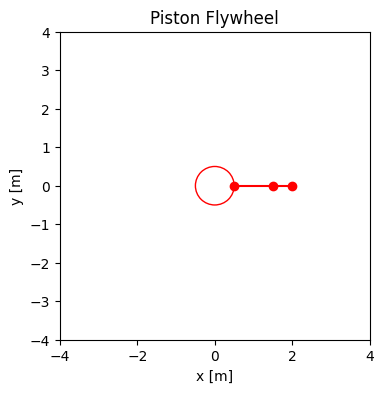

In [16]:
x_cart = r*np.cos(ans[:,0]) + np.sqrt(l**2 - (r*np.sin(ans[:,0]))**2) + p
y_cart = np.zeros(len(x_cart))
x_att1 = x_cart - p
y_att1 = np.zeros(len(x_cart))
x_att = r*np.cos(ans[:,0])
y_att = r*np.sin(ans[:,0])

fig, ax = plt.subplots(1,1,figsize=(4,4))
def update(i):
# clear the axis each frame
    ax.clear()
    # replot things
    ax.scatter(x_cart[i],y_cart[i],c='r',marker='o')
    ax.scatter(x_att1[i],y_att1[i],c='r',marker='o')
    ax.scatter(x_att[i],y_att[i],c='r',marker='o')
    ax.add_patch(plt.Circle((0,0), r, color='r', fill=False))
    ax.plot([x_cart[i],x_att1[i],x_att[i]],[y_cart[i],y_att1[i],y_att[i]],'r')    
    lim = 4
    ax.set_xlim((-lim, lim))
    ax.set_ylim((-lim, lim))
    ax.set_title('Piston Flywheel')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')

ani = animation.FuncAnimation(fig, update, frames=frms, interval=1)
ani.save('Piston_Flywheel.gif',writer='pillow',fps=25)
